[*********************100%%**********************]  1 of 1 completed

Error Cuadrático Medio en el Conjunto de Entrenamiento: 2235.739339899159


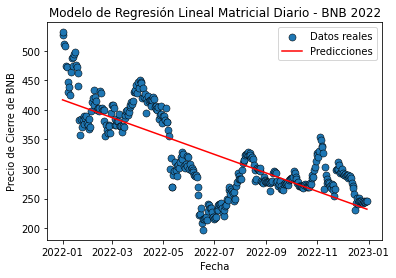

[*********************100%%**********************]  1 of 1 completed


Error Cuadrático Medio en el Conjunto de 2023: 9827.690502326794


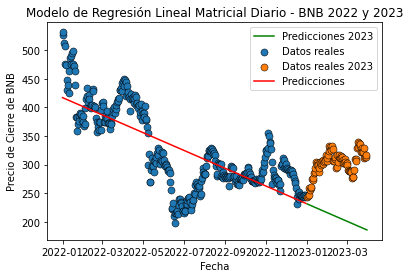

In [15]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Símbolo de BNB en Yahoo Finance
simbolo_bnb = 'BNB-USD'

# Especificar el rango de fechas para el año 2022
inicio_2022 = '2022-01-01'
fin_2022 = '2022-12-31'

# Obtener datos históricos cada días de BNB en el año 2022
datos_bnb_2022 = yf.download(simbolo_bnb, start=inicio_2022, end=fin_2022, interval='1d')

# Extraer columnas de tiempo y precio de cierre
datos_seleccionados = datos_bnb_2022[['Close']].reset_index()

# Crear la matriz de diseño
X = np.column_stack((np.ones_like(datos_seleccionados.index), datos_seleccionados.index))

# Obtener la variable dependiente
y = datos_seleccionados['Close'].values

# Calcular los coeficientes utilizando la regresión lineal matricial
theta = np.linalg.inv(X.T @ X) @ X.T @ y

# Realizar predicciones en el conjunto de datos de entrenamiento
y_pred = X @ theta

# Calcular el error cuadrático medio en el conjunto de datos de entrenamiento
mse = mean_squared_error(y, y_pred)
print(f"Error Cuadrático Medio en el Conjunto de Entrenamiento: {mse}")
# Convertir la serie a un array de numpy antes de realizar la indexación
dates_array = np.array(datos_seleccionados['Date'])

# Visualizar los resultados
plt.scatter(dates_array, y, label='Datos reales', marker='o', s=50, edgecolors='black', linewidth=.5, alpha=1)
plt.plot(dates_array, y_pred, label='Predicciones', color='red')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre de BNB')
plt.title('Modelo de Regresión Lineal Matricial Diario - BNB 2022')
plt.legend()
plt.show()


# Especificar el rango de fechas hasta marzo de 2023
inicio_2023 = '2023-01-01'
fin_2023 = '2023-03-31'

# Crear un DataFrame con las fechas hasta marzo de 2023
fechas_2023 = pd.date_range(start=inicio_2023, end=fin_2023)

# Crear una columna de índice que represente el número de días desde el inicio del conjunto de datos original
indice_2023 = (fechas_2023 - pd.to_datetime(inicio_2022)).days

# Crear la matriz de diseño para el año 2023
X_2023 = np.column_stack((np.ones_like(indice_2023), indice_2023))

# Perform predictions for the year 2023
y_pred_2023 = X_2023 @ theta

# Convert y_pred_2023 to a one-dimensional array
y_pred_2023 = y_pred_2023.flatten()

#Convert fechas_2023 to a NumPy array
fechas_2023 = fechas_2023.to_pydatetime()

# Descargar los datos reales para 2023
datos_bnb_2023 = yf.download(simbolo_bnb, start=inicio_2023, end=fin_2023, interval='1d')

# Extraer columnas de tiempo y precio de cierre
datos_seleccionados_2023 = datos_bnb_2023[['Close']].reset_index()

# Convertir la serie a un array de numpy antes de realizar la indexación
dates_array_2023 = np.array(datos_seleccionados_2023['Date'])

# Obtener la variable dependiente
y_2023 = datos_seleccionados_2023['Close'].values

# Calcular el error cuadrático medio en el conjunto de datos de 2023
mse_2023 = mean_squared_error(y_2023, y_pred_2023[:len(y_2023)])
print(f"Error Cuadrático Medio en el Conjunto de 2023: {mse_2023}")

# Visualize the results
plt.plot(fechas_2023, y_pred_2023, label='Predicciones 2023', color='green')
plt.scatter(dates_array, y, label='Datos reales', marker='o', s=50, edgecolors='black', linewidth=.5, alpha=1)
plt.scatter(dates_array_2023, y_2023, label='Datos reales 2023', marker='o', s=50, edgecolors='black', linewidth=.5, alpha=1)

plt.plot(dates_array, y_pred, label='Predicciones', color='red')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre de BNB')
plt.title('Modelo de Regresión Lineal Matricial Diario - BNB 2022 y 2023')
plt.legend()
plt.show()

In [3]:
!pip install yfinance

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.0/73.0 KB 1.3 MB/s eta 0:00:00 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.8/116.8 KB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 6.9 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.5/505.5 KB 8.6 MB/s eta 0:00:00 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 8.8 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 5.1 MB/s eta 0:00:00m eta 0:00:010:00:01m
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.9/147.9 KB 3.1 MB/s eta 0:00:003.4 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 5.4 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━

In [9]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 5.7 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.2/301.2 KB 5.0 MB/s eta 0:00:005.2 MB/s eta 0:00:01
